In [387]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data source: https://www.kaggle.com/c/titanic/data

In [478]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## EDA

In [479]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [480]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Count missing and unique values

In [481]:
missing = df_train.isnull().sum()
missing_pct = df_train.isnull().sum() / df_train.isnull().count() * 100
missing_pct = (round(missing_pct, 1))
unique = { col: df_train[col].unique().size for col in df_train.columns.values }
info = pd.concat([pd.Series(unique), missing, missing_pct], axis=1, keys=['Unique', 'Missing', 'Missing %'])
display(info)

,Unique,Missing,Missing %
PassengerId,891,0,0.0
Survived,2,0,0.0
Pclass,3,0,0.0
Name,891,0,0.0
Sex,2,0,0.0
Age,89,177,19.9
SibSp,7,0,0.0
Parch,7,0,0.0
Ticket,681,0,0.0
Fare,248,0,0.0


In [482]:
df_train[['Ticket', 'Survived']].sample(10)

,Ticket,Survived
535,F.C.C. 13529,1
864,233866,0
799,345773,0
687,349228,0
536,113050,0
640,350050,0
159,CA. 2343,0
376,C 7077,1
725,315094,0
681,PC 17572,1


In [483]:
df_train[['PassengerId', 'Survived']].sample(10)

,PassengerId,Survived
129,130,0
277,278,0
85,86,1
756,757,0
362,363,0
668,669,0
82,83,1
407,408,1
694,695,0
833,834,0


In [484]:
df_train[['Name', 'Survived']].sample(10)

,Name,Survived
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1
2,"Heikkinen, Miss. Laina",1
227,"Lovell, Mr. John Hall (""Henry"")",0
677,"Turja, Miss. Anna Sofia",1
489,"Coutts, Master. Eden Leslie ""Neville""",1
704,"Hansen, Mr. Henrik Juul",0
850,"Andersson, Master. Sigvard Harald Elias",0
629,"O'Connell, Mr. Patrick D",0
53,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1
295,"Lewy, Mr. Ervin G",0


In [485]:
masters = df_train[df_train['Name'].str.contains('Master')]
masters[masters['Survived'] == 1].size / masters.size * 100

57.49999999999999

In [486]:
df_train[['Cabin', 'Survived']][df_train['Cabin'].notnull()].sample(10)

,Cabin,Survived
284,A19,0
148,F2,0
839,C47,1
872,B51 B53 B55,0
647,A26,1
224,C93,1
571,C101,1
369,B35,1
782,D6,0
139,B86,0


Features to drop:
- Ticket; doesn't seem to relevant meaning
- PassengerId; doesn't seem to relevant meaning
- Name; doesn't seem to relevant meaning
- Cabin; could inform model about passgener location, but too many missing values

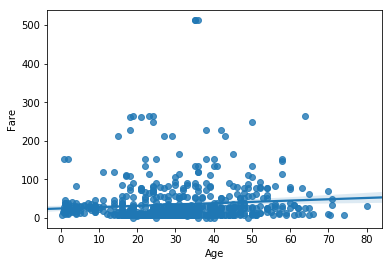

In [487]:
sns.regplot(data=df_train[(df_train['Age'].notnull()) & (df_train['Embarked'].notnull())], x='Age', y='Fare')

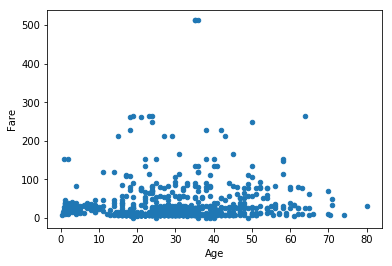

In [488]:
# do children pay fare?
df_train.plot.scatter(x='Age', y='Fare')

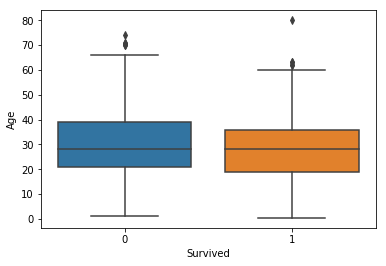

In [489]:
sns.boxplot(x="Survived", y="Age", data=df_train)

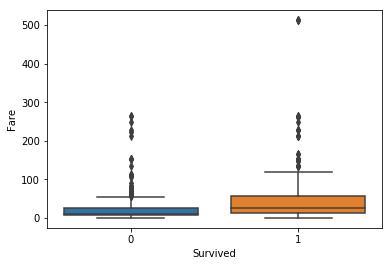

In [490]:
sns.boxplot(x="Survived", y="Fare", data=df_train)

In [491]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [492]:
males = df_train[df_train['Sex'] == 'male']
females = df_train[df_train['Sex'] == 'female']
print(f'Male survival rate: {males[males["Survived"] == 1].shape[0] / males.shape[0]}')
print(f'Female survival rate: {females[females["Survived"] == 1].shape[0] / females.shape[0]}')

Male survival rate: 0.18890814558058924
Female survival rate: 0.7420382165605095


### Impute missing Age values

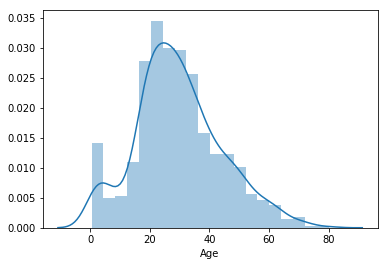

In [493]:
sns.distplot(df_train[df_train['Age'].notnull()]['Age'])

The distribution of ages has a local maximum, but is close to a Gaussian distribution. There may be more sophicated methods, but for now we can fill the missing values using a uniform distribution of random ages between -1 and 1 standard units.

In [494]:
mean, std = non_null_ages.mean(), non_null_ages.std()
ages = df_train['Age'].copy()
null_age_indices = ages[ages.isnull()].index
imputed_ages = np.random.randint(mean - std, mean + std, null_age_indices.size)
ages.iloc[null_age_indices] = imputed_ages
df_train['Age'] = ages

In [495]:
df_train['Age'].isnull().sum()

0

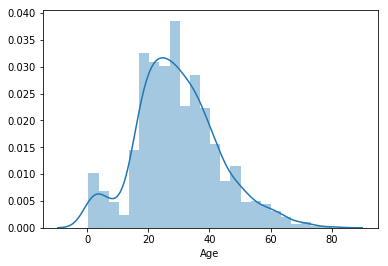

In [496]:
sns.distplot(df_train[df_train['Age'].notnull()]['Age'])

### Impute missing Embarked values

In [497]:
foo = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
foo = pd.get_dummies(foo, columns=['Sex', 'Survived', 'Pclass', 'Embarked'])

In [498]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [499]:
foo.corr()[['Embarked_C', 'Embarked_Q', 'Embarked_S']]

,Embarked_C,Embarked_Q,Embarked_S
Age,0.013090,-0.021610,-0.005426
SibSp,-0.059528,-0.026354,0.070941
Parch,-0.011069,-0.081228,0.063036
Fare,0.269335,-0.117216,-0.166603
Sex_female,0.082853,0.074115,-0.125722
Sex_male,-0.082853,-0.074115,0.125722
Survived_0,-0.168240,-0.003650,0.155660
Survived_1,0.168240,0.003650,-0.155660
Pclass_1,0.296423,-0.155342,-0.170379
Pclass_2,-0.125416,-0.127301,0.192061


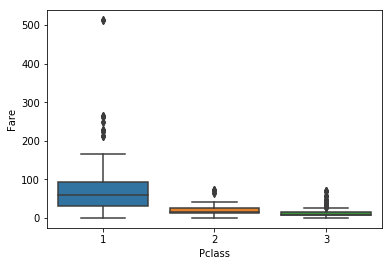

In [500]:
sns.boxplot(x="Pclass", y="Fare", data=df_train)

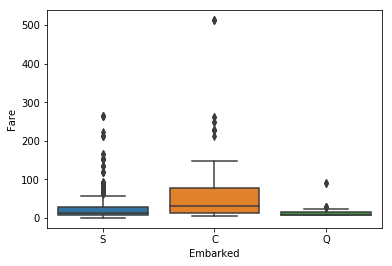

In [501]:
sns.boxplot(x="Embarked", y="Fare", data=df_train)

Both passengers where in Pclass 1, which is correlated with embarking at port C. Both passengers also paid a fare of 80, which is is within the interquartile range of passengers embarking from port C and outside the range for other ports. Both passengers were women, who were slightly more likely to embark from port C than Q.

In [502]:
embarked = df_train['Embarked'].copy()
null_indices = embarked[embarked.isnull()].index
embarked.iloc[null_indices] = ['C', 'C']
df_train['Embarked'] = embarked

In [503]:
df_train['Embarked'].isnull().sum()

0

## With this, we can begin first round of modeling

### Baseline prediction

In [504]:
survival_rate = df_train[df_train['Survived'] == 1].size / df_train.size
print(f'ZeroR (majority class) accuracy: {1-survival_rate}')

ZeroR (majority class) accuracy: 0.6161616161616161


In [505]:
y = df_train['Survived']
X = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])

# encode categorial features
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

In [506]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 32.3 KB


### Decision Tree Classification with GridSearchCV

In [507]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': list(range(3, 11)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(2, 11))
}

cls = GridSearchCV(DecisionTreeClassifier(), params, cv=10, return_train_score=True)
cls.fit(X, y)

/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 

In [508]:
cls.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [509]:
def print_gs_cv_results(classifier):
    print('Best params:')
    for k, v in classifier.best_params_.items():
        print(f'{k}: {v}')
        
    print(f'\nBest index: {classifier.best_index_}')
    if 'mean_train_score' in classifier.cv_results_:
        print(f'Train score: {classifier.cv_results_["mean_train_score"][classifier.best_index_]}')
    print(f'Best score: {classifier.best_score_}')

In [510]:
print_gs_cv_results(cls)

Best params:
max_depth: 9
min_samples_leaf: 7
min_samples_split: 6

Best index: 535
Train score: 0.8710574898568245
Best score: 0.8361391694725028


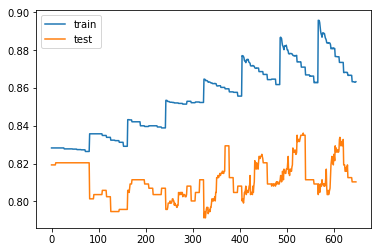

In [511]:
# plot train vs test scores
mean_test_scores = cls.cv_results_['mean_test_score']
mean_train_scores = cls.cv_results_['mean_train_score']
x = range(0, len(mean_test_scores))

plt.plot(x, cls.cv_results_['mean_train_score'], label='train')
plt.plot(x, cls.cv_results_['mean_test_score'], label='test')
plt.legend(loc='upper left')

In [512]:
tree = DecisionTreeClassifier(random_state=42, **cls.best_params_)
tree.fit(X, y)

importances = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=['Importances']).sort_values(by='Importances', ascending=False)
display(importances)

,Importances
Sex_male,0.491521
Fare,0.149099
Age,0.144965
Pclass_3,0.123104
SibSp,0.038504
Parch,0.019718
Pclass_2,0.018326
Embarked_S,0.014765
Embarked_Q,0.000000


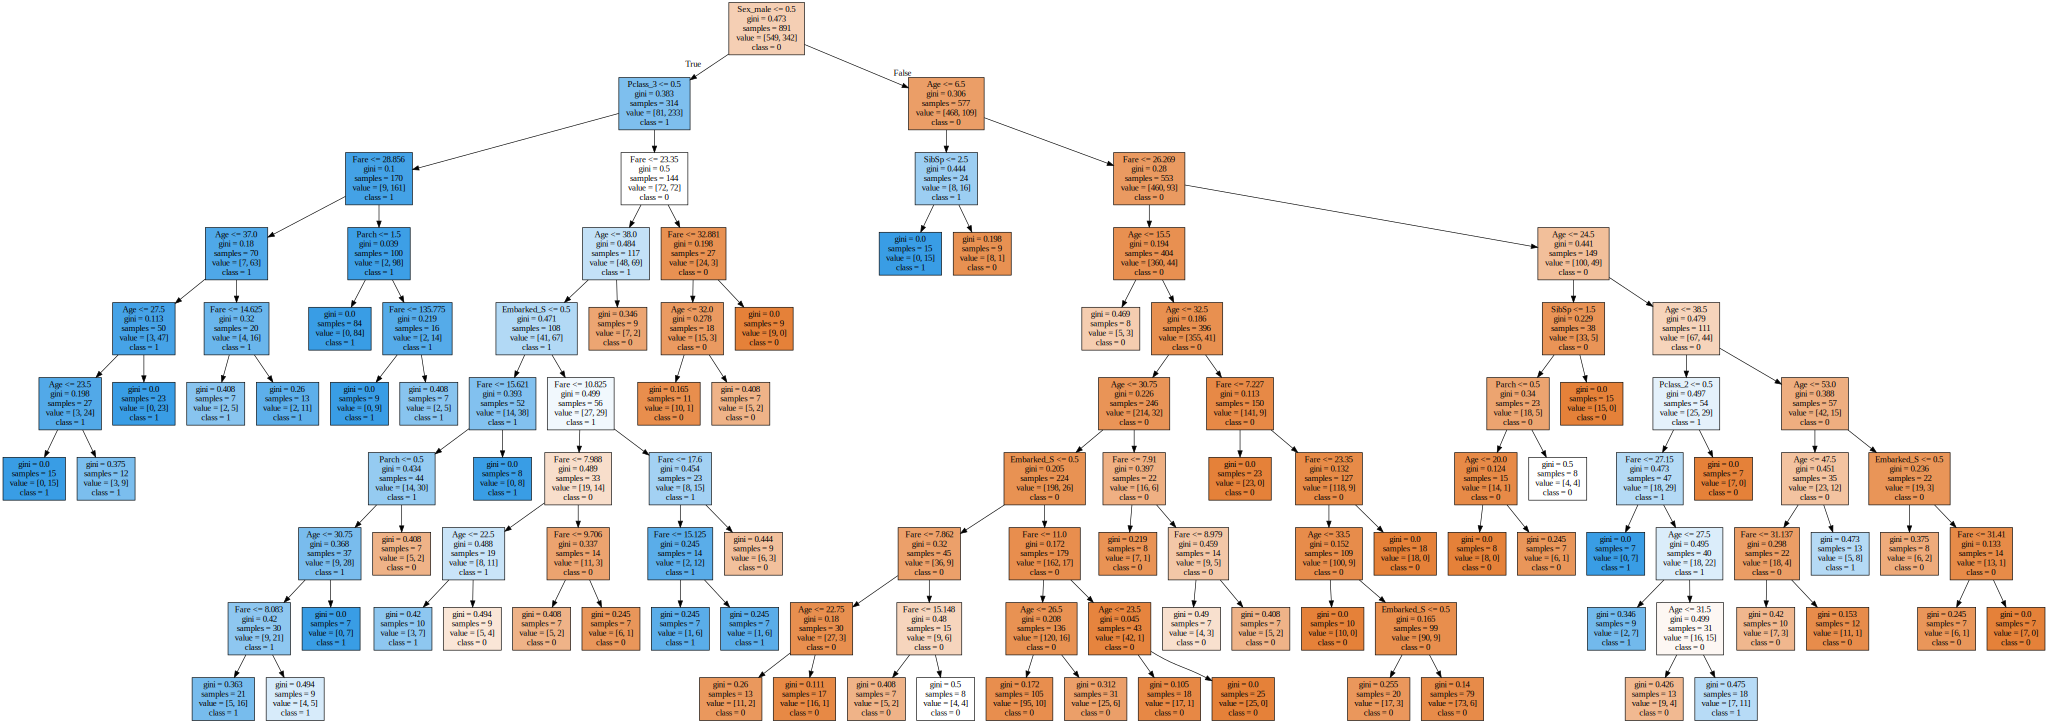

In [513]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file="tree1.dot", 
                class_names=y.unique().astype(str),
                feature_names=X.columns.values,
                filled=True)

with open("tree1.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### Random Forest Classification with GridSearchCV

In [514]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'bootstrap': [True, False],
    'max_depth': list(range(3, 11)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
}

cls = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs=-1, verbose=2, return_train_score=True)
cls.fit(X, y)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 387 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 3303 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 5493 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 8163 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 11325 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:   56.7s finished
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [515]:
print_gs_cv_results(cls)

Best params:
bootstrap: False
max_depth: 9
min_samples_leaf: 3
min_samples_split: 6

Best index: 1282
Train score: 0.899866559931516
Best score: 0.8406285072951739


Score improved over decision tree classification only slightly by about 0.007.

In [516]:
def print_cv_results(results):
    for k, v in results.items():
        metric = k.replace('_', ' ')
        print(f'Mean {metric}: {v.mean()}')

### Logistic Regression

In [517]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

cv_results = cross_validate(LogisticRegression(), X, y, cv=10, return_train_score=True)
print_cv_results(cv_results)


Mean fit time: 0.0051925420761108395
Mean score time: 0.0013055086135864257
Mean test score: 0.7946266031097492
Mean train score: 0.8043406786522638


/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

### K Nearest Neighbors

In [518]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': list(range(2, 11)),
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
}    

cls = GridSearchCV(KNeighborsClassifier(), params, cv=10, return_train_score=True)
cls.fit(X, y)

print_gs_cv_results(cls)

Best params:
leaf_size: 20
n_neighbors: 3
p: 1

Best index: 20
Train score: 0.8484851675705924
Best score: 0.7328843995510662


/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### SVM Classification with GridSearchCV


In [519]:
print(f'default gamma value: {1/X.columns.shape[0]}')

default gamma value: 0.1111111111111111


In [520]:
from sklearn.svm import SVC

params = {
    'gamma': [0.01, 0.03, 0.05, 0.1, 0.2, 0.4, 0.8, 1.0],
    'C': [0.001, 0.01, 0.1, 1, 10],
}
    
cls = GridSearchCV(SVC(), params, cv=10, return_train_score=True)
cls.fit(X, y)

print_gs_cv_results(cls)

Best params:
C: 10
gamma: 0.01

Best index: 32
Train score: 0.8583369472798585
Best score: 0.7542087542087542


/Users/fxtan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Naive Bayes Classification

In [521]:
from sklearn.naive_bayes import GaussianNB

cv_results = cross_validate(GaussianNB(), X, y, cv=10, return_train_score=True)
print_cv_results(cv_results)

Mean fit time: 0.002867913246154785
Mean score time: 0.0012084007263183593
Mean test score: 0.7890835319487003
Mean train score: 0.7977301750311698
